# Analyse de l'Impact du Revenu National sur l'Adoption des Énergies Renouvelables : Une Étude à l'Aide de l'ANOVA  (ANOVA à un facteur) 

## Problématique

  L'adoption des énergies renouvelables varie considérablement à travers le monde, influencée par une multitude de facteurs économiques, sociaux et politiques. Parmi ces facteurs, le revenu national des pays joue un rôle crucial. 
  
  **L'une des questions centrales dans l'étude de la transition énergétique mondiale est de savoir si les pays à revenu élevé adoptent de manière significativement plus importante les énergies renouvelables que les pays à revenu plus faible. Cette question soulève une interrogation fondamentale sur l’impact des ressources économiques sur la transition énergétique mondiale.**

  L'objectif est de comparer le taux d'adoption des énergies renouvelables entre les groupes de pays classés par revenu (High income, Low income, Lower middle income, Upper middle income). En utilisant une **ANOVA à un facteur (One-Way ANOVA)**, nous testerons si le taux d'énergie renouvelable est statistiquement différent entre les groupes de pays en fonction de leur niveau de revenu.

  L'ANOVA permet de vérifier si les différences observées dans les taux d'énergie renouvelable sont significatives et non dues au hasard. Ce test statistique nous aidera à déterminer s'il existe une relation entre le niveau de revenu d'un pays et son taux d'adoption des énergies renouvelables.

## Étape 1 : Importation des bibliothèques nécessaires

In [1]:
# Importer les bibliothèques
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway, shapiro, levene
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms

## Étape 2 : Chargement et exploration des données

In [2]:
# Charger le fichier CSV contenant les données
df = pd.read_csv("transition_energetique_pays_2023.csv")

# Afficher les premières lignes pour vérifier la structure des données
print(df.head())

                          Pays  Taux d'énergie renouvelable  Année  \
0                  Afghanistan                    17.846154   2023   
1  Africa Eastern and Southern                    62.614134   2023   
2   Africa Western and Central                    77.223132   2023   
3                      Albania                    39.283333   2023   
4                      Algeria                     0.150000   2023   

   Investissements en énergies renouvelables (% du PIB)  \
0                                           4.838663      
1                                           1.346697      
2                                           0.335375      
3                                           0.000000      
4                                           0.018654      

   PIB par habitant (USD)  Taux de scolarisation secondaire (%)  \
0              415.707417                             47.154018   
1             1659.515290                             69.520690   
2             1568.7243

In [3]:
# Vérification des colonnes et des types de données
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 10 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Pays                                                  266 non-null    object 
 1   Taux d'énergie renouvelable                           266 non-null    float64
 2   Année                                                 266 non-null    int64  
 3   Investissements en énergies renouvelables (% du PIB)  266 non-null    float64
 4   PIB par habitant (USD)                                266 non-null    float64
 5   Taux de scolarisation secondaire (%)                  266 non-null    float64
 6   Accès à l'électricité (%)                             266 non-null    float64
 7   Revenu                                                266 non-null    object 
 8   Dépassement 50%                                       266 no

## Étape 3 : Préparation des données

#### 1-Sélectionner les colonnes nécessaires.

In [4]:
# Créer un DataFrame avec les colonnes nécessaires pour l'ANOVA
df_anova = df[['Pays', 'Taux d\'énergie renouvelable', 'Revenu']]

#### 2-Vérifier la distribution des données.

Avant de procéder à l'ANOVA, il est important de vérifier si les groupes sont correctement formés (par revenu) et de s'assurer qu'il y a assez de données dans chaque groupe pour que l'ANOVA soit significative.

In [5]:
# Vérification du nombre de pays dans chaque groupe de revenu
group_counts = df_anova.groupby('Revenu')['Pays'].count()
print(group_counts)

Revenu
High income            106
Low income              23
Lower middle income     66
Upper middle income     71
Name: Pays, dtype: int64


La répartition des pays par groupe de revenu est assez bien équilibrée, à l'exception du groupe 'Low income', qui est sous-représenté avec seulement 23 pays, ce qui pourrait légèrement affecter la fiabilité des résultats de l'ANOVA.

In [6]:
# Vérification des statistiques descriptives
print(df_anova.describe())

       Taux d'énergie renouvelable
count                   266.000000
mean                     29.667803
std                      27.240385
min                       0.000000
25%                       7.401923
50%                      21.750203
75%                      46.682692
max                      95.833333


   - La distribution des taux d'énergie renouvelable est large, avec une moyenne d'environ 29.67% mais une grande variabilité (écart type de 27.24%).
   - Les valeurs extrêmes (0% et 95.83%) montrent qu'il existe à la fois des pays avec une adoption très faible et d'autres avec une adoption très élevée des énergies renouvelables.

**a-Boxplot pour visualiser la distribution des taux d'adoption des énergies renouvelables selon les groupes de revenu :**

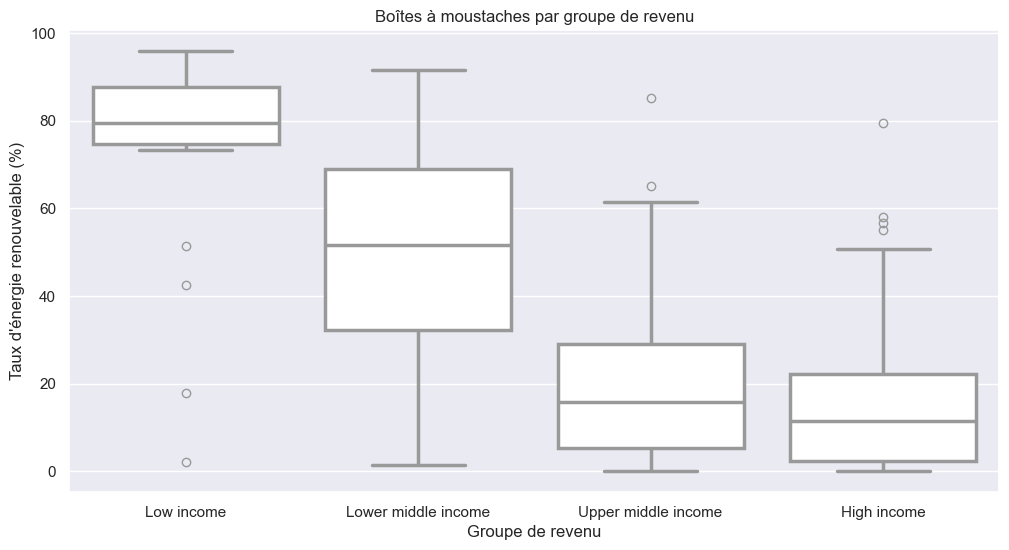

In [7]:
# Appliquer le style par défaut de seaborn
sns.set()

plt.figure(figsize=(12, 6))  

# Créer le boxplot pour visualiser la distribution des taux d'énergie renouvelable par groupe de revenu
ax = sns.boxplot(x="Revenu", y="Taux d'énergie renouvelable", data=df_anova, color='white', linewidth=2.5)

# Ajouter les labels et le titre
plt.xlabel('Groupe de revenu')
plt.ylabel('Taux d\'énergie renouvelable (%)')
plt.title('Boîtes à moustaches par groupe de revenu')

# Afficher le graphique
plt.show()

   - **Low income** : 
     - Ce groupe montre un taux d'énergie renouvelable élevé, avec une médiane autour de 80 %. La boîte est étroite, indiquant une faible variation entre les pays de ce groupe.
     - La majorité des données sont concentrées autour de la médiane, indiquant une adoption élevée des énergies renouvelables.

   - **Lower middle income** :
     - Médiane intermédiaire: La médiane se situe autour de 50%, montrant une adoption modérée des énergies renouvelables.
     - Large gamme: Les taux d'adoption varient considérablement, indiquant une diversité dans l'adoption des énergies renouvelables parmi ces pays (de ce groupe).

   - **Upper middle income** :
     - Médiane inférieure: La médiane est autour de 18%, ce qui signifie une adoption plus faible des énergies renouvelables.
     - Quelques valeurs aberrantes au-dessus de 80 % suggèrent que certains pays dans ce groupe utilisent un taux d'énergie renouvelable très élevé.

   - **High income** :
     - Médiane basse: La médiane est proche de 10%, indiquant que les pays à revenu élevé ont généralement des taux d'adoption plus faibles.
     - Certains pays à revenu élevé adoptent beaucoup plus d'énergies renouvelables que la moyenne de leur groupe.

**b-Histogramme du taux d'énergie renouvelable par revenu**

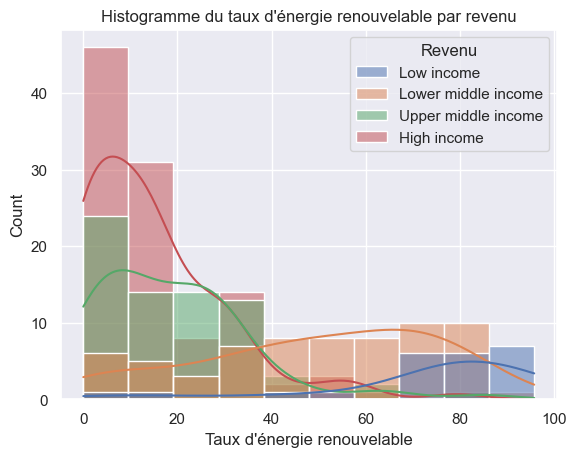

In [8]:
sns.histplot(data=df_anova, x='Taux d\'énergie renouvelable', hue='Revenu', kde=True)
plt.title("Histogramme du taux d'énergie renouvelable par revenu")
plt.show()

**Low Income (Faible Revenu) :**
- Pic au-dessus de 80 % : La majorité des pays à faible revenu ont des taux d'adoption des énergies renouvelables autour de 80 %.
- Distribution concentrée : Une grande concentration de pays adopte des niveaux élevés de renouvelables.
  
**Lower Middle Income (Revenu Intermédiaire Inférieur) :**

- Pic entre 40 % et 75 % : La distribution montre une adoption modérée des énergies renouvelables.
- Varieté Modérée : La distribution est plus large, indiquant une certaine variation dans l'adoption des énergies renouvelables parmi ces pays(de ce groupe).

**Upper Middle Income (Revenu Intermédiaire Supérieur) :**

- Pic autour de 5 % à 30 % : Ce groupe montre un taux d'adoption plus bas, avec la majorité des pays autour de 5 % à 30 %.
- avec quelques pays adoptant beaucoup plus les énergies renouvelables.

**High Income (Revenu Élevé) :**

- Pic à 2 % à 20 % : Les pays à revenu élevé montrent une adoption des énergies renouvelables plus faible.
- Bien que la majorité des pays soient entre 10 % et 20 %, il y a des outliers significatifs qui adoptent à des taux beaucoup plus élevés.

**Conclusion :**

Les pays à faible revenu semblent avoir une adoption des énergies renouvelables plus élevée, potentiellement due à leur dépendance sur des sources d'énergie renouvelables traditionnelles.

Les pays à revenu intermédiaire montrent une gamme plus variée d'adoption, reflétant des différences dans l'accès aux ressources et aux technologies.

Les pays à revenu élevé ont une adoption plus faible mais avec une variabilité significative, probablement due à une diversité dans les choix énergétiques disponibles et les politiques environnementales.

## Étape 4 : Effectuer l'ANOVA pour tester l'influence du revenu sur le taux d'énergie renouvelable

#### 1-Formulation des Hypothèses 

**Hypothèse nulle (H₀)** :  
Les groupes de revenu (Low income, Lower middle income, Upper middle income, High income) n’ont pas d’effet significatif sur le taux d’énergie renouvelable.  
En d'autres termes, les moyennes des taux d'énergie renouvelable sont égales entre les groupes.  

H₀ : μ₁ = μ₂ = μ₃ = μ₄  
où :  
- μ₁ : Moyenne pour le groupe "Low income"  
- μ₂ : Moyenne pour le groupe "Lower middle income"  
- μ₃ : Moyenne pour le groupe "Upper middle income"  
- μ₄ : Moyenne pour le groupe "High income"  

**Hypothèse alternative (H₁)** :  
Les groupes de revenu influencent significativement le taux d’énergie renouvelable.  
Cela signifie qu’au moins une moyenne diffère des autres.  

H₁ : ∃ i, j tels que μᵢ ≠ μⱼ  

#### 2-Effectuer l'ANOVA pour tester l'influence de la catégorie de revenu sur le taux d'énergie renouvelable

In [9]:
# Effectuer l'ANOVA pour tester l'influence de la catégorie de revenu sur le taux d'énergie renouvelable
anova_renewable = smf.ols('Q("Taux d\'énergie renouvelable") ~ Revenu', data=df_anova).fit()

# Résumé des résultats de l'ANOVA
print(anova_renewable.summary())

                                   OLS Regression Results                                   
Dep. Variable:     Q("Taux d'énergie renouvelable")   R-squared:                       0.518
Model:                                          OLS   Adj. R-squared:                  0.513
Method:                               Least Squares   F-statistic:                     94.01
Date:                              Fri, 03 Jan 2025   Prob (F-statistic):           2.53e-41
Time:                                      11:09:40   Log-Likelihood:                -1158.8
No. Observations:                               266   AIC:                             2326.
Df Residuals:                                   262   BIC:                             2340.
Df Model:                                         3                                         
Covariance Type:                          nonrobust                                         
                                    coef    std err          t      P>

A-**R² = 0.518** : Cela signifie que 51,8 % de la variation du taux d'énergie renouvelable est expliquée par les groupes de revenu.

B-**F-statistic (94.01) et Prob(F-statistic) (2.53e-41) :**

-La valeur de la statistique F est élevée et le p-value est extrêmement faible, ce qui permet **de rejeter l'hypothèse nulle (H₀)**. Cela signifie que les groupes de revenu ont un effet significatif sur le taux d'énergie renouvelable.

C-**Coefficients :**

1. **Intercept : 14.8523**
   - Ce coefficient représente la valeur moyenne prédite du taux d'énergie renouvelable pour la catégorie de référence, qui est **"High income"** (les catégories de revenu sont codées de manière dummy). En moyenne, les pays à revenu élevé ont un taux d'énergie renouvelable de 14,85 %.

2. **Revenu[T.Low income] : 58.8122**
   - Les pays à faible revenu (Low income) ont, en moyenne, un taux d'énergie renouvelable **58,81 % plus élevé** que les pays à revenu élevé. Ce résultat est hautement significatif (p < 0.001).

3. **Revenu[T.Lower middle income] : 34.7123**
   - Les pays à revenu intermédiaire inférieur (Lower middle income) ont, en moyenne, un taux d'énergie renouvelable **34,71 % plus élevé** que les pays à revenu élevé. Ce résultat est également hautement significatif (p < 0.001).

4. **Revenu[T.Upper middle income] : 4.1865**
   - Les pays à revenu intermédiaire supérieur (Upper middle income) ont un taux d'énergie renouvelable **4,18 % plus élevé** que les pays à revenu élevé. Cependant, ce résultat **n'est pas statistiquement significatif** (p = 0.152).
     
D-**Conclusion**
- Les groupes de revenu influencent significativement le taux d'énergie renouvelable.
- Les groupes "Low income" et "Lower middle income" montrent des différences significatives par rapport au groupe "High income".
- Le groupe "Upper middle income" n'est pas significativement différent du groupe "High income".

## Étape 5 : Appliquer le test post-hoc de Tukey

              Multiple Comparison of Means - Tukey HSD, FWER=0.05               
       group1              group2       meandiff p-adj   lower    upper   reject
--------------------------------------------------------------------------------
        High income          Low income  58.8122    0.0  47.5046  70.1198   True
        High income Lower middle income  34.7123    0.0  27.0045  42.4201   True
        High income Upper middle income   4.1865 0.4781  -3.3521  11.7252  False
         Low income Lower middle income -24.0999    0.0 -36.0027 -12.1971   True
         Low income Upper middle income -54.6256    0.0 -66.4197 -42.8316   True
Lower middle income Upper middle income -30.5257    0.0  -38.931 -22.1205   True
--------------------------------------------------------------------------------


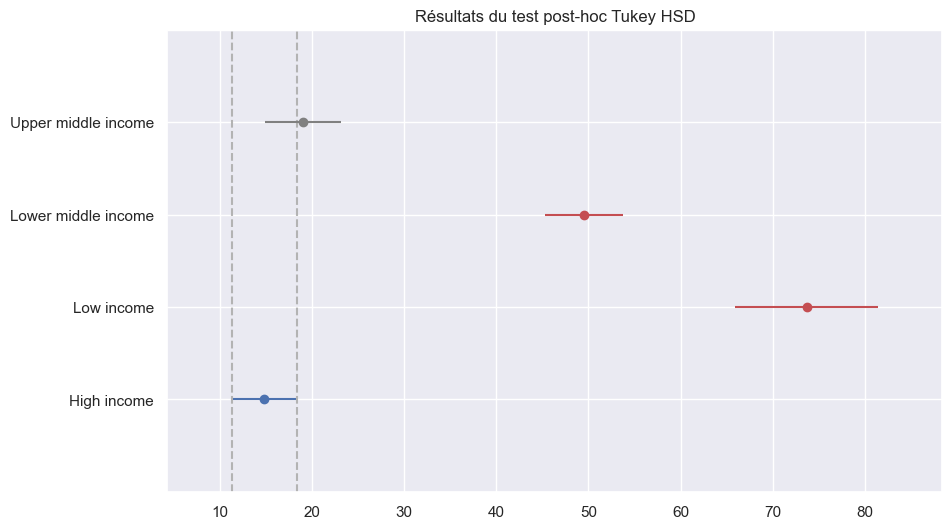

In [10]:
# Appliquer le test post-hoc de Tukey
tukey_result = pairwise_tukeyhsd(
    endog=df_anova["Taux d'énergie renouvelable"],  # Variable dépendante
    groups=df_anova["Revenu"],                     # Variable indépendante (groupes)
    alpha=0.05                                     # Niveau de signification
)

# Afficher les résultats du test
print(tukey_result)

# Visualiser les résultats
tukey_result.plot_simultaneous(comparison_name='High income', figsize=(10, 6))
plt.title("Résultats du test post-hoc Tukey HSD")
plt.show()


- Axe Y : Représente les différentes catégories de revenus.
- Axe X : Indique la différence des moyennes entre les groupes.

----------

- Low income :
A un taux d'énergie renouvelable significativement plus élevé que tous les autres groupes.
- High income :
Montre des taux d'énergie renouvelable similaires aux pays Upper middle income, mais nettement inférieurs à ceux des groupes Low income et Lower middle income.

-------

Le test post-hoc de Tukey montre des différences claires et significatives entre les groupes de revenus en termes de taux d'énergie renouvelable, à l'exception d'une similitude entre les groupes High Income et Upper Middle Income. 

## Réponse à la problématique

   Les résultats suggèrent qu'il est important de reconsidérer l'hypothèse selon laquelle les pays à revenu élevé adoptent systématiquement plus d'énergies renouvelables. Plusieurs facteurs pourraient expliquer cette observation :
   
1. **Politiques internationales et aides au développement** : Les pays à faible revenu peuvent être incités à adopter des énergies renouvelables par des accords internationaux ou des subventions qui facilitent l'accès à ces technologies.
2. **Contraintes et opportunités spécifiques** : Les pays à revenu faible ou intermédiaire inférieur peuvent être plus vulnérables aux changements climatiques et aux défis énergétiques, ce qui pourrait les pousser à adopter des solutions d'énergie renouvelable plus rapidement. En revanche, les pays riches peuvent avoir des infrastructures énergétiques plus complexes et une dépendance plus marquée aux énergies fossiles.
3. **Technologies de diffusion rapide** : Les innovations dans les énergies renouvelables, telles que l'énergie solaire, sont de plus en plus accessibles à faible coût, ce qui pourrait expliquer leur adoption rapide dans des pays avec des ressources économiques limitées.

L'hypothèse de base selon laquelle les pays à revenu élevé adopteraient plus d'énergies renouvelables que les pays à revenu faible est remise en question par les résultats. En réalité, les pays à faible revenu et à revenu intermédiaire inférieur semblent adopter des énergies renouvelables à un taux plus élevé, potentiellement en raison de facteurs politiques et de contraintes énergétiques spécifiques. Cette analyse met en lumière la complexité de la transition énergétique mondiale, qui ne dépend pas uniquement des ressources économiques, mais aussi de facteurs externes tels que les politiques internationales, les aides au développement, et les besoins énergétiques immédiats des pays.